사용한 데이터 셋
https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

## 용어정리
- CLIENTNUM: 각 고객을 고유하게 식별하는 정수형 식별자입니다.
- **`Attrition_Flag`**: 이진형 변수로, 고객이 이탈했는지 여부를 나타냅니다. 이탈했다면 True (1), 이탈하지 않았다면 False (0)입니다.
- Customer_Age: 고객의 나이를 나타내는 정수형 변수입니다.
- Gender: 고객의 성별을 나타내는 문자열 변수입니다.
- Dependent_count: 고객이 부양하는 가족의 수를 나타내는 정수형 변수입니다.
- Education_Level: 고객의 교육 수준을 나타내는 문자열 변수입니다.
- Marital_Status: 고객의 결혼 여부를 나타내는 문자열 변수입니다.
- Income_Category: 고객의 소득 카테고리를 나타내는 문자열 변수입니다.
- Card_Category: 고객이 소지한 신용카드의 종류를 나타내는 문자열 변수입니다.
- Months_on_book: 고객이 신용카드를 사용한 기간을 나타내는 정수형 변수입니다.
- Total_Relationship_Count: 고객이 신용카드 제공자와 가지고 있는 총 관계의 수를 나타내는 정수형 변수입니다.
- Months_Inactive_12_mon: 지난 12개월 동안 고객이 비활성 상태였던 달의 수를 나타내는 정수형 변수입니다.
- Contacts_Count_12_mon: 지난 12개월 동안 고객이 가지고 있던 연락 횟수를 나타내는 정수형 변수입니다.
- Credit_Limit: 고객의 신용한도를 나타내는 정수형 변수입니다.
- Total_Revolving_Bal: 고객의 회전잔액 총액을 나타내는 정수형 변수입니다.
- Avg_Open_To_Buy: 평균 여유 신용한도를 나타내는 정수형 변수입니다.
- Total_Amt_Chng_Q4_Q1: 4분기에서 1분기로의 총 금액 변동을 나타내는 정수형 변수입니다.
- Total_Trans_Amt: 총 거래 금액을 나타내는 정수형 변수입니다.
- Total_Trans_Ct: 총 거래 횟수를 나타내는 정수형 변수입니다.
- Total_Ct_Chng_Q4_Q1: 4분기에서 1분기로의 총 거래 횟수 변동을 나타내는 정수형 변수입니다.
- Avg_Utilization_Ratio: 평균 이용률 비율을 나타내는 정수형 변수입니다.
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: 다음과 같은 특성을 기반으로 누군가 이탈할지 여부를 예측하기 위한 Naive Bayes 분류기

# 데이터셋

In [2]:
df = pd.read_csv("2차프로젝트/BankChurners.csv")

## Naive_Bayes 컬럼은 삭제 - 예측한 결과는 필요가 없다
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

## Attrited Customer = 1, Existing Customer = 0 으로 수정
# df.replace({"Attrited Customer":1, "Existing Customer":0}, inplace=True)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [3]:
## 중복 고객 데이터 확인
print(df.duplicated().sum())
print(len(df.CLIENTNUM.unique()))

0
10127


In [4]:
## 결측치 확인
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
## object 데이터 값 확인 - 분석하기 어려운 값은 없다. ('-', 해석하기 어렵거나 전처리가 필요한 형태가 없다.)
print(df.Attrition_Flag.unique())
print(df.Gender.unique())
print(df.Education_Level.unique())
print(df.Marital_Status.unique())
print(df.Income_Category.unique())
print(df.Card_Category.unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# EDA

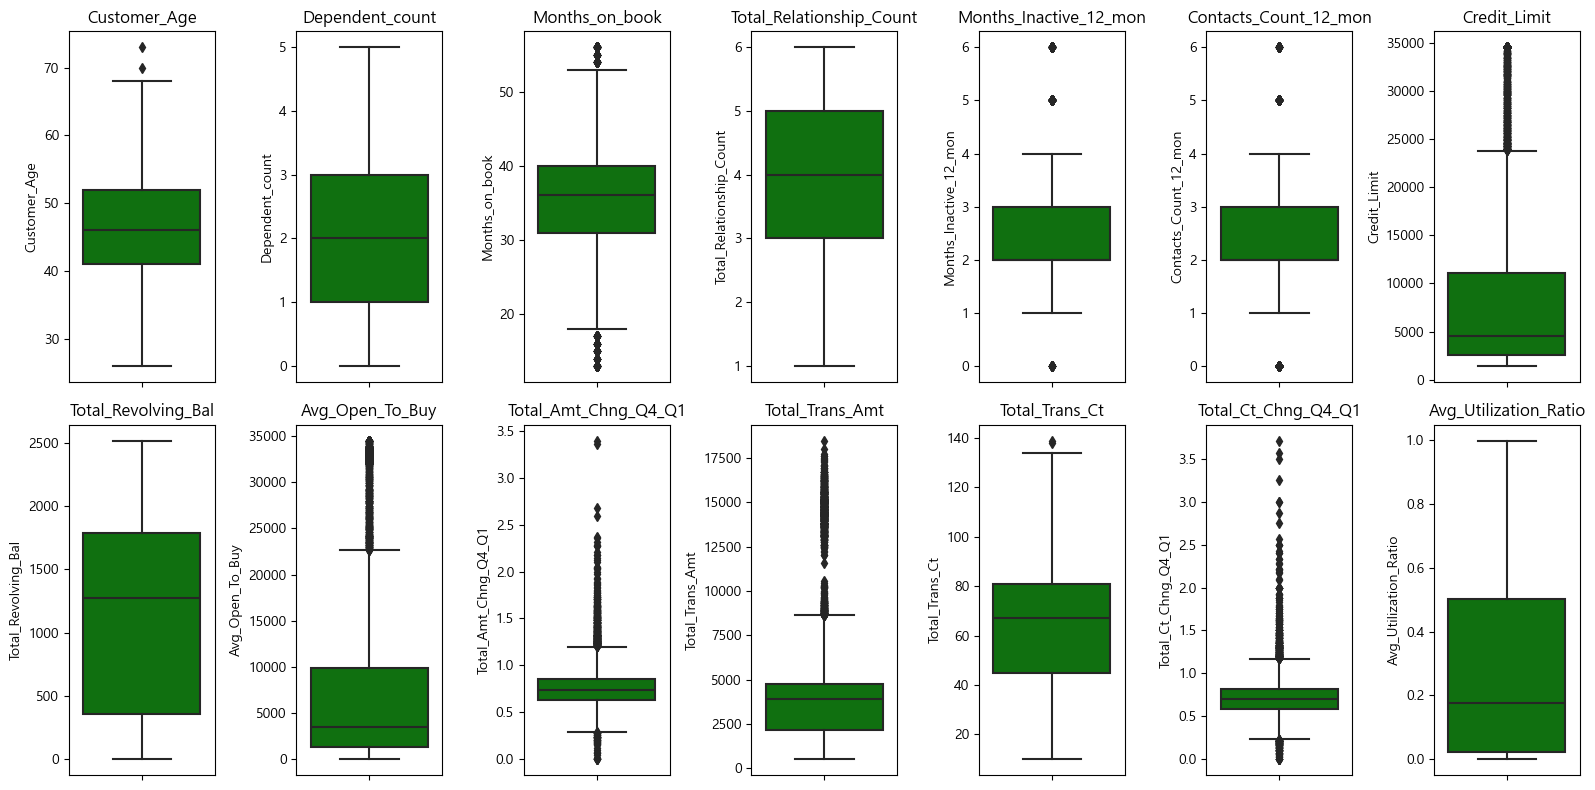

In [8]:
cols = list(df.describe().columns[1:])
fig, axes = plt.subplots(2, 7, figsize=(16, 8))

## seaborn
for i in range(len(cols)):
    sns.boxplot(y=df[cols[i]], ax=axes[i//7, i%7], color='g') 
    axes[i//7, i%7].set_title(cols[i])

plt.tight_layout()
plt.show()

몇 가지 상자플롯에서 이상치를 확인할 수 있습니다.
저는 교육 수준으로만 먼저 분석을 진행하기에 별다른 전처리 없이 진행하였습니다.

### 교육수준 그래프

In [9]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

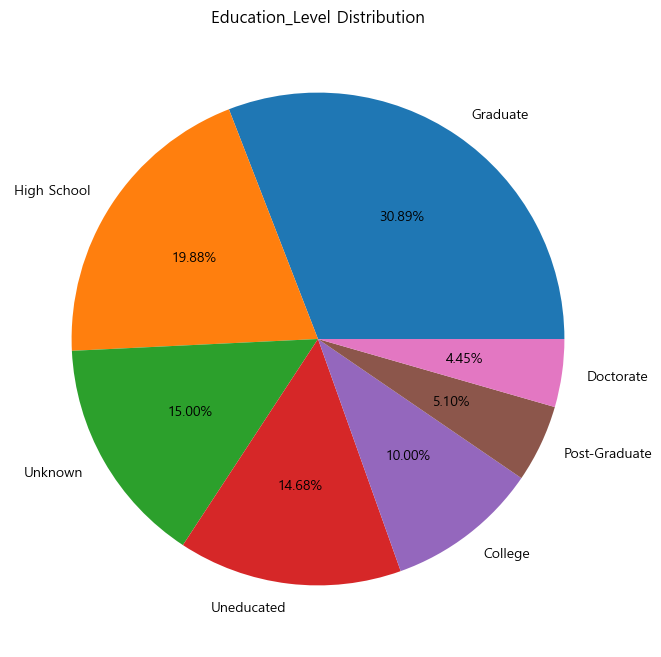

In [10]:
## 교육 수준별 비율 그래프
result = df.groupby('Education_Level').size().sort_values(ascending=False).reset_index(name='count')

plt.figure(figsize=(8, 8))
plt.pie(x=result['count'], labels=result['Education_Level'], autopct='%1.2f%%')
plt.title('Education_Level Distribution')
plt.show()

교육 수준별 비율을 보면 다음과 같이 Graduate가 다른 것들에 비해 현저히 높은 것을 알 수 있습니다.<br> 
따라서 현재 신용카드 발급을 받았던 고객들의 교육 수준은 Graduate가 많다고 말할 수 있습니다. <br>
또한, 고학위 수준의 사람들은 비율이 적습니다.(고학위를 따는 것이 소수이기 때문에 잘 반영된 결과라고 해석할 수 있습니다.)

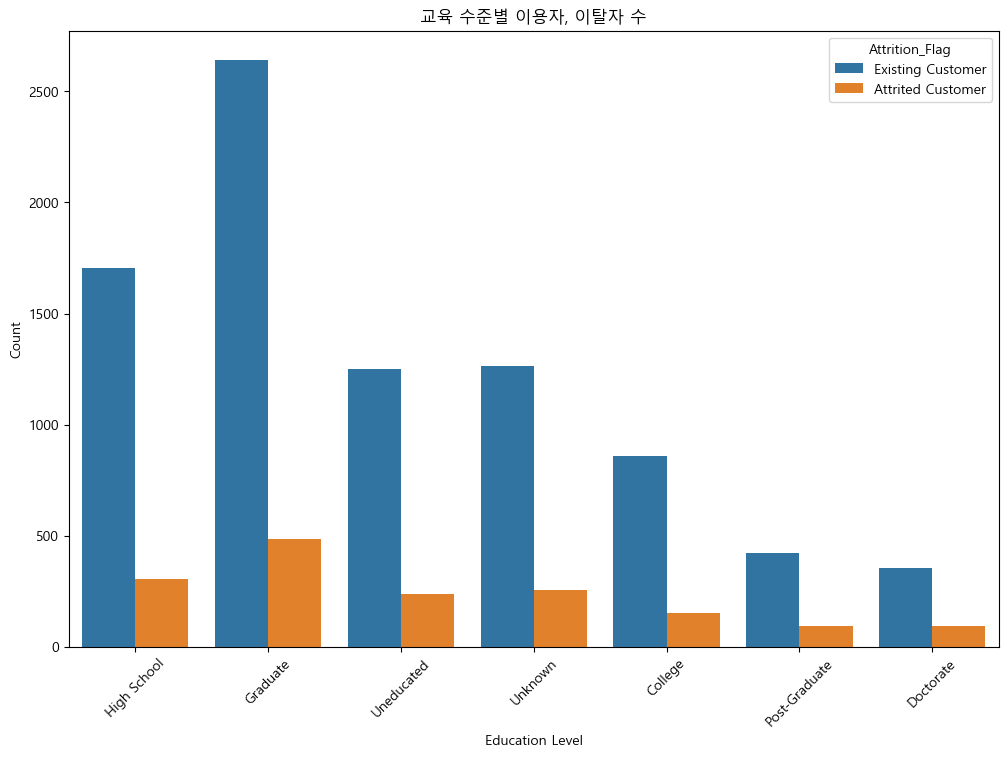

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag')
plt.title('교육 수준별 이용자, 이탈자 수')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 각 교육 수준별 이탈율 그래프

In [12]:
table = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])

# 이탈한 고객, 기존 고객 비율 열 추가
table['Attrited_ratio'] = table['Attrited Customer'] / (table['Attrited Customer'] + table['Existing Customer'])
table['Existing_ratio'] = table['Existing Customer'] / (table['Attrited Customer'] + table['Existing Customer'])
table

Attrition_Flag,Attrited Customer,Existing Customer,Attrited_ratio,Existing_ratio
Education_Level,,,,
College,154,859,0.152024,0.847976
Doctorate,95,356,0.210643,0.789357
Graduate,487,2641,0.155691,0.844309
High School,306,1707,0.152012,0.847988
Post-Graduate,92,424,0.178295,0.821705
Uneducated,237,1250,0.159381,0.840619
Unknown,256,1263,0.168532,0.831468


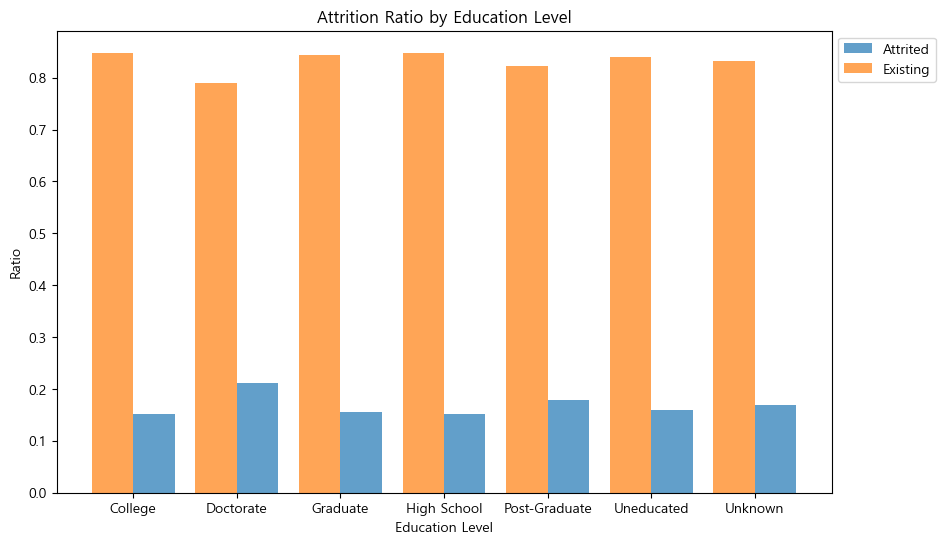

In [13]:
plt.figure(figsize=(10, 6))

bar_width = 0.4
bar_positions = np.arange(len(table.index))

plt.bar(bar_positions + bar_width, table['Attrited_ratio'], width=bar_width, label='Attrited', alpha=0.7)
plt.bar(bar_positions, table['Existing_ratio'], width=bar_width, label='Existing', alpha=0.7)

plt.xticks(bar_positions + bar_width / 2, table.index)
plt.xlabel('Education Level')
plt.ylabel('Ratio')
plt.title('Attrition Ratio by Education Level')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

그래프를 보면 교육 수준별 이탈율이 0.1 ~ 0.2 정도로 매우 낮을 것을 확인할 수 있다.<br> 
### **따라서 교육 수준과 이탈에 대한 관련성이 없다고 판단이 된다.**
더 정확한 분석을 위해 독립성 검정을 진행하였다.

## 독립성 검정 - 교육수준 vs 이탈 , (유의수준 0.05)

In [14]:
# 1. 가설설정
# 귀무가설 (H0): Education_Level과 Attrition_Flag은 독립적이다. 즉, 교육 수준과 이탈 여부 간에는 관련성이 없다.
# 대립가설 (H1): Education_Level과 Attrition_Flag은 독립적이지 않다. 즉, 교육 수준과 이탈 여부 간에는 관련성이 있다.

In [15]:
table = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])
table

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


### 두 범주형 집단(이용고객, 이탈고객)의 독립성을 검정하기 위해 카이제곱 검정으로 진행.

In [16]:
# 2. 유의수준 0.05
# 3. 검정실시 (통계량, p-value, 기대값)
from scipy.stats import chi2_contingency

statistic, p_value, dof, expected = chi2_contingency(table, correction=False)

print(f"Chi-square Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < .05:
    print("0.05보다 작기 때문에 귀무가설을 기각한다.")
else:
    print("0.05보다 크기 때문에 귀무가설을 채택한다.")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(np.round(expected, 2))

Chi-square Statistic: 12.511205404830507
P-value: 0.05148913147336634
0.05보다 크기 때문에 귀무가설을 채택한다.
Degrees of Freedom: 6
Expected Frequencies:
[[ 162.75  850.25]
 [  72.46  378.54]
 [ 502.54 2625.46]
 [ 323.41 1689.59]
 [  82.9   433.1 ]
 [ 238.9  1248.1 ]
 [ 244.04 1274.96]]


## **Education_Level과 Attrition_Flag은 독립적이다. 즉, 교육 수준과 이탈 여부 간에는 관련성이 없다.**

교육 수준이 높을수록 `소득수준`, `신용한도`, `평균 여유 신용한도`가 높을 수 있다고 생각한다.<br> 
이유는, 높은 수준의 교육으로 높은 수입의 직장을 다닐 가능성이 있다고 예상.<br>
따라서 시각화를 통해서 교육수준에 대한 것을 확인한다.

### 교육 수준 + 소득 수준

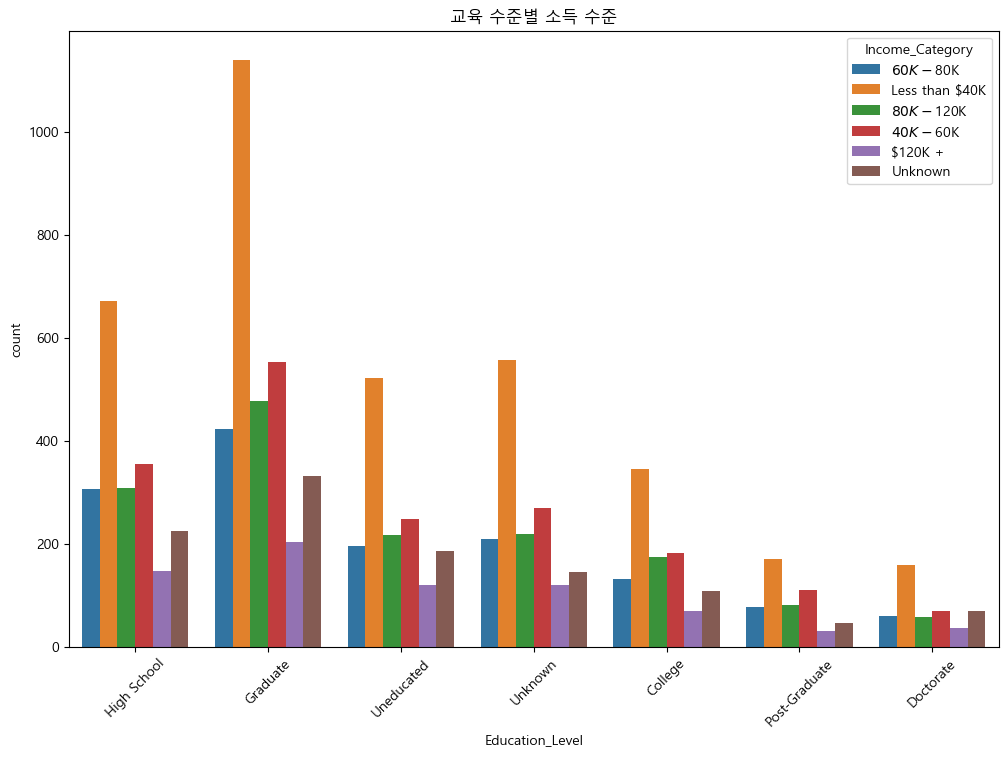

In [17]:
# 교육 수준 + 소득 수준
plt.figure(figsize=(12, 8))
sns.countplot(x='Education_Level', hue='Income_Category', data=df)
plt.xticks(rotation=45)
plt.title('교육 수준별 소득 수준')
plt.show()

### 교육 수준 + 신용한도

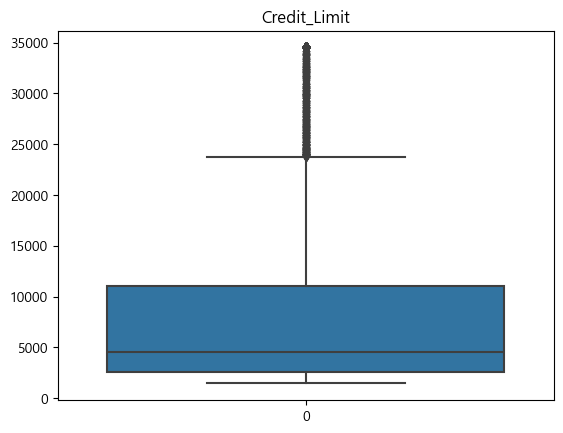

In [18]:
sns.boxplot(df.Credit_Limit)
plt.title("Credit_Limit")
plt.show()

이상치가 매우 많은 것을 알 수 있다. 따라서 이상치들의 대한 처리를 어떻게 할지 고민을 해야 할 것 같다.

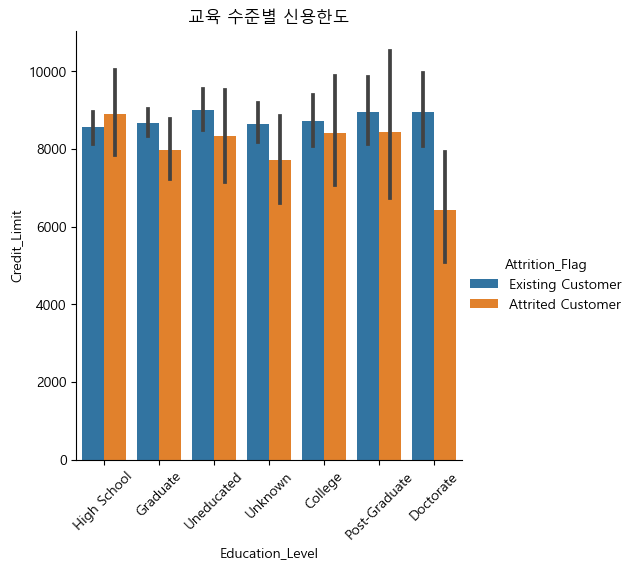

In [19]:
# 교육 수준 + 신용한도 (이상치 처리 없이)
sns.catplot(x="Education_Level", y="Credit_Limit", hue="Attrition_Flag", data=df, kind="bar")
plt.xticks(rotation=45)
plt.title('교육 수준별 신용한도')
plt.show()

### 교육 수준 + 평균 여유 신용한도

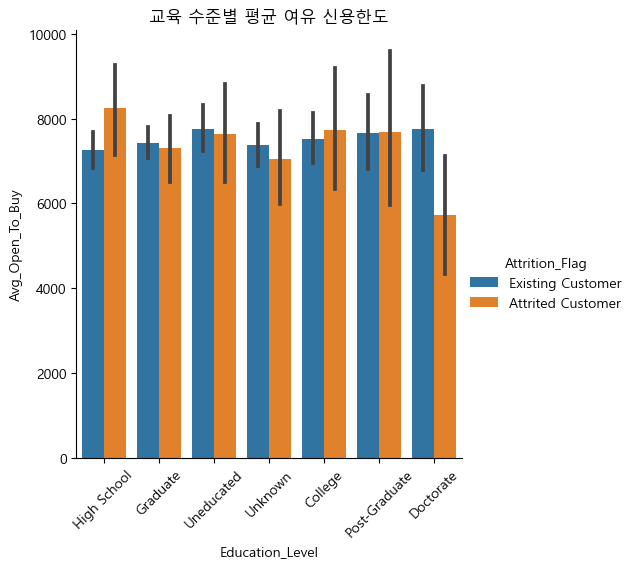

In [20]:
# 교육 수준 + 평균 여유 신용한도
sns.catplot(x='Education_Level', y="Avg_Open_To_Buy", hue='Attrition_Flag', data=df, kind='bar')
plt.xticks(rotation=45)
plt.title('교육 수준별 평균 여유 신용한도')
plt.show()